# Temporal and Spatial DataMining


## Exercise 01: Python Basics

The following task covers the basics for creating browser-based scripts (Notebooks) based on Python code. Using Python is effectively for interactive scientific and data-intensive computing. This Notebook will start by stepping through some of the Python features that are useful to the practice of data science, focusing especially on the syntax it offers beyond the standard features of Python

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# print(plt.style.available)
plt.style.use('seaborn-v0_8-colorblind')

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

I strongly recommend installation using conda as it will bring in all of the executable dependencies that cartopy requires. 

With conda installed, installing the latest version of cartopy would look like:

`>>conda install --channel conda-forge cartopy`

---
### Task 1: Vectors and matrices

This will be a quick introduction to some common operations in numpy.

- create the vectors $x$ and $y$

    $x=\begin{pmatrix}-2.0 \\ 4.0\end{pmatrix}$ 

    $y=\begin{pmatrix}5.0 \\ 1.0\end{pmatrix}$


- print the vectors using `print()`
- print the first entry of the vector $x$ and the last entry of the vector $y$
>__Note__: A certain value can be accessed via the [index] within the square brackets. Note that the first entry with the index 0 is selected.


In [28]:
####################
# Your Code Here   #
####################

x = np.array([-2.0, 4.0])
y = np.array([5.0, 1.0])

print(x)
print(y)

print(x[0], y[1])

[-2.  4.]
[5. 1.]
-2.0 1.0


 Perform the following operations with vectors $\mathbf{a}$ and $\mathbf{b}$:
 - Dot or Scalar Product: $c = \mathbf{a}^\mathrm{T}  \mathbf{b}$
 - Outer Product: $\mathbf{C} = \mathbf{a} \mathbf{b}^\mathrm{T}$
 - Elementwise Multiplication: $\mathbf{c} = \mathbf{a} \odot \mathbf{b}$ where $c_i = a_i \cdot b_i$

>**Reference**: [linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

In [29]:
####################
# Your Code Here   #
####################

print(np.dot(x,y))
print(np.outer(x,y))
print(x*y)

-6.0
[[-10.  -2.]
 [ 20.   4.]]
[-10.   4.]


The second important structure in linear algebra are for sure *matrices*. These can be created using numpy arrays as well, by nesting *lists* (a list is defined by using brackets '[' and ']'):

In [30]:
M = np.array([[1, 4], [3, 7]])
N = np.array([[3, 1], [4, 5]])

print("Matrix M =\n", M, '\n')
print("Matrix N =\n", N, '\n')

Matrix M =
 [[1 4]
 [3 7]] 

Matrix N =
 [[3 1]
 [4 5]] 



Additionally numpy provides its own type for matrices called **matrix**. You can either convert your existing arrays to a matrix or create new ones from lists:

>**Reference:** [matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html)

In [31]:
# Convert
v = np.asmatrix(x).T

# Create new object
u = np.asmatrix(y).T

# Define new matrix (nesting lists)
A = np.asmatrix([[1.0, -0.5], [-0.5, 1.0]])
# Define new Matrix using existing arrays
B = np.matrix([x, y])

print("Vector x as np.array: ", x, "Dimension: ", x.shape)
print("Vector v as np.matrix: ", v, "Dimension: ", v.shape)
print("v:vector transposed: \n", v.T, '\n')

print('Matrix A = \n', A, '\n')
print('Matrix B = \n', B, '\n')

Vector x as np.array:  [-2.  4.] Dimension:  (2,)
Vector v as np.matrix:  [[-2.]
 [ 4.]] Dimension:  (2, 1)
v:vector transposed: 
 [[-2.  4.]] 

Matrix A = 
 [[ 1.  -0.5]
 [-0.5  1. ]] 

Matrix B = 
 [[-2.  4.]
 [ 5.  1.]] 



Numpy makes it simple to perform common matrix operations

- perform the following operations: 
    - $\mathbf{A}= (\mathbf{v}-\mathbf{u})^\text{T}\cdot\mathbf{M}\cdot(\mathbf{v}-\mathbf{u})$

In [32]:
# use the following Matrix M
M = np.matrix([[1,2], [3,4]])

####################
# Your Code Here   #
####################

A = (v-u).T * M * (v-u)
print(f'A = {A}')

A = [[-20.]]


>**Functions**:

>A function is a block of code (started by `def`) which only runs when it is called. You can pass data, known as parameters, into a function. A function can return data as a result.

In [33]:
def example_function(a, inc):
    """This is a docstring to document your function!"""
    c = a + inc
    return c

print(example_function("hello", " world"))
print(example_function(100, 20))
print(example_function(x, y))

hello world
120
[3. 5.]


>Anonymous functions can also be created using *lambda*:

In [34]:
# also adds two parameters and returns the sum

add2 = lambda a, b : a+b
add2(3, 4)

7

The euclidean distance of two vectors is defined as:
$$d(p, q)=\|q-p\|_{2}=\sqrt{\left(q_{1}-p_{1}\right)^{2}+\cdots+\left(q_{n}-p_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(q_{i}-p_{i}\right)^{2}}$$

> **Note:** To calculate the square root use **np.sqrt** on arrays you can rely on pythons syntactic sugar (**x\*\*n** =$y^n$) for exponentiation.

- Implement the function *euc_loop* using numpy arrays (e.g. **x** and **y**) using a [for loop](https://docs.python.org/3/tutorial/controlflow.html)

In [35]:
####################
# Your Code Here   #
####################

def euc_loop(x,y):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] - y[i])**2
    
    return np.sqrt(sum)

print(euc_loop(x,y))

7.615773105863909


- Implement the function *euc_sum* using numpy arrays (e.g. **a** and **b**) and **np.sum**. 

>__Note__: You should not use any loops in your solution.

In [36]:
####################
# Your Code Here   #
####################

def euc_sum(x,y):
    return np.sqrt(np.sum((x-y)**2))

print(euc_sum(x,y))

7.615773105863909


Implement the function *euc* using numpy _matrices_ (e.g. __u__ and __v__)

>__Note__: Recall the definition of the Euclidean distance using the dot product.

In [37]:
####################
# Your Code Here   #
####################

def euc(u,v):
    return np.dot(u,v)

The euclidean distance is a special form of the <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">p-norm</a>:

$pnorm(\mathbf{u},\mathbf{v},p) = (\sum_d^D |u_d - v_d|^p)^{\frac{1}{p}}$

- Implement a function **pnorm** with takes as argument two vectors **a**, **b** and a parameter **p**:

In [38]:
####################
# Your Code Here   #
####################

def pnorm(a,b,p):
    return np.sum((a-b)**p)**(1/p)

print(pnorm(x,y,p=2))

7.615773105863909


The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors __u__, __v__ and a covariance matrix __S__ is given by: $\Delta(\mathbf{u}, \mathbf{v}) = \sqrt{(\mathbf{u}-\mathbf{v})^TS^{-1}(\mathbf{u}-\mathbf{v})}$

with the vektors: **u**$=\begin{pmatrix}u_{1} \\ u_{2} \\ ... \\ u_{n-1} \\ u_{n} \end{pmatrix}$ and 
**v**$= \begin{pmatrix} v_{1} \\ v_{2} \\ ... \\ v_{n-1} \\ v_{n} \end{pmatrix}$

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix S:

$S=\begin{pmatrix}1.2 & -0.7 \\ -0.7 & 1.2 \end{pmatrix}$

In [39]:
S = np.matrix([[1.2, -.7], [-.7, 1.2]])

- Implement a function **mahalanobis** which takes as argument two vectors __a__, __b__ and a matrix **S**:

>__Note:__ __a__ and __b__ are two numpy arrays. 

In [40]:
####################
# Your Code Here   #
####################

def mahalanobis(a,b,S):
    x = (a-b).T @ np.linalg.inv(S) @ (a-b)
    return np.sqrt(x)

print(mahalanobis(x,y,S))

[[6.50505876]]


- What happens if the covariance matrix **S** is equal to the identity matrix **I**?
Confirm your hypothesis by using numpys **np.eye**.

In [41]:
####################
# Your Code Here   #
####################

I = np.eye(len(S))
print(mahalanobis(x,y,I))

# eucldian distance is computed with identity matrix

7.615773105863909


**Further tasks**
- Work out the basic functions of the library *numpy* with the help of a freely chosen tutorial (e.g. http://www.python-kurs.eu/numpy.php).
- Many other commands are also available e.g. on https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html.

---
### Task 2: Plotting

This exercise is about getting to know different plot mechanisms. You will be provided with 2 different data sets. Data set 1 serves to represent temporal data and data set 2 serves to represent spatial data. The additional task deals with the moving average and uses the same data set as in task 1.

Plotting is an essential tool for data visualization. You should read this [quick tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) on how to use matplotlib.

#### Plot temporal data

The task is to graphically display the given data.

To do this, follow these steps:

- Read in the time series

- Display the time series as a Line Plot

- Use the timestamp of the time series as x-axis label

- What is a meaningful label for the y-axis?

- Enlarge the area of the graph

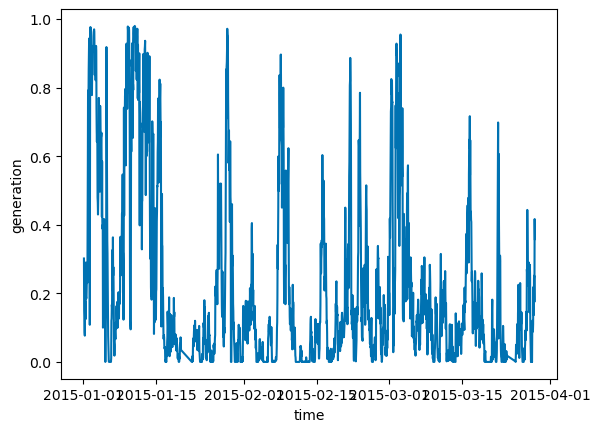

In [42]:
# read time series
# replace path with own path
data_df = pd.read_csv('data/relative_power_generation.csv', index_col=0)
data_df.index = pd.to_datetime(data_df.index)

####################
# Your Code Here   #
####################

plt.plot(data_df)
plt.xlabel('time')
plt.ylabel('generation')
plt.show()

#### Plot spatial data

The next task deals with the representation of data on maps.

The following steps have to be solved:

- Read in the spatial data

- Display the points on the map with different sizes depending on their values.

>**Hint:** Lon and Lat Values need to be projected into the map geometries

- run the following line to check the documentation `mrc.transform_points?`

In [47]:
mrc.transform_points?

Signature: mrc.transform_points(src_crs, x, y, z=None, trap=False)
Docstring:
transform_points(src_crs, x, y[, z])

Transform the given coordinates, in the given source
coordinate system (``src_crs``), to this coordinate system.

Parameters
----------
src_crs
    instance of :class:`CRS` that represents the
    coordinate system of ``x``, ``y`` and ``z``.
x
    the x coordinates (array), in ``src_crs`` coordinates,
    to transform.  May be 1 or 2 dimensional.
y
    the y coordinates (array), in ``src_crs`` coordinates,
    to transform.  Its shape must match that of x.
z: optional
    the z coordinates (array), in ``src_crs`` coordinates, to
    transform.  Defaults to None.
    If supplied, its shape must match that of x.
trap
    Whether proj errors for "latitude or longitude exceeded limits" and
    "tolerance condition error" should be trapped.

Returns
-------
    Array of shape ``x.shape + (3, )`` in this coordinate system.
File:      ~/anaconda3/envs/e2ml-env/lib/python3.9/site

In [53]:
# read the data
# Columns in data:  NaN, size, lat, lon
spatial_data = np.genfromtxt('data/german_cities_with_population.csv', delimiter=',')

# values of individual columns
spatial_data

####################
# Your Code Here   #
####################
spatial_data[:,2]


array([      nan, 50.770833, 48.833333, ..., 50.75    , 50.733333,
       49.016667])

CRSError: Invalid CRS input: <Figure size 3000x1500 with 1 Axes>

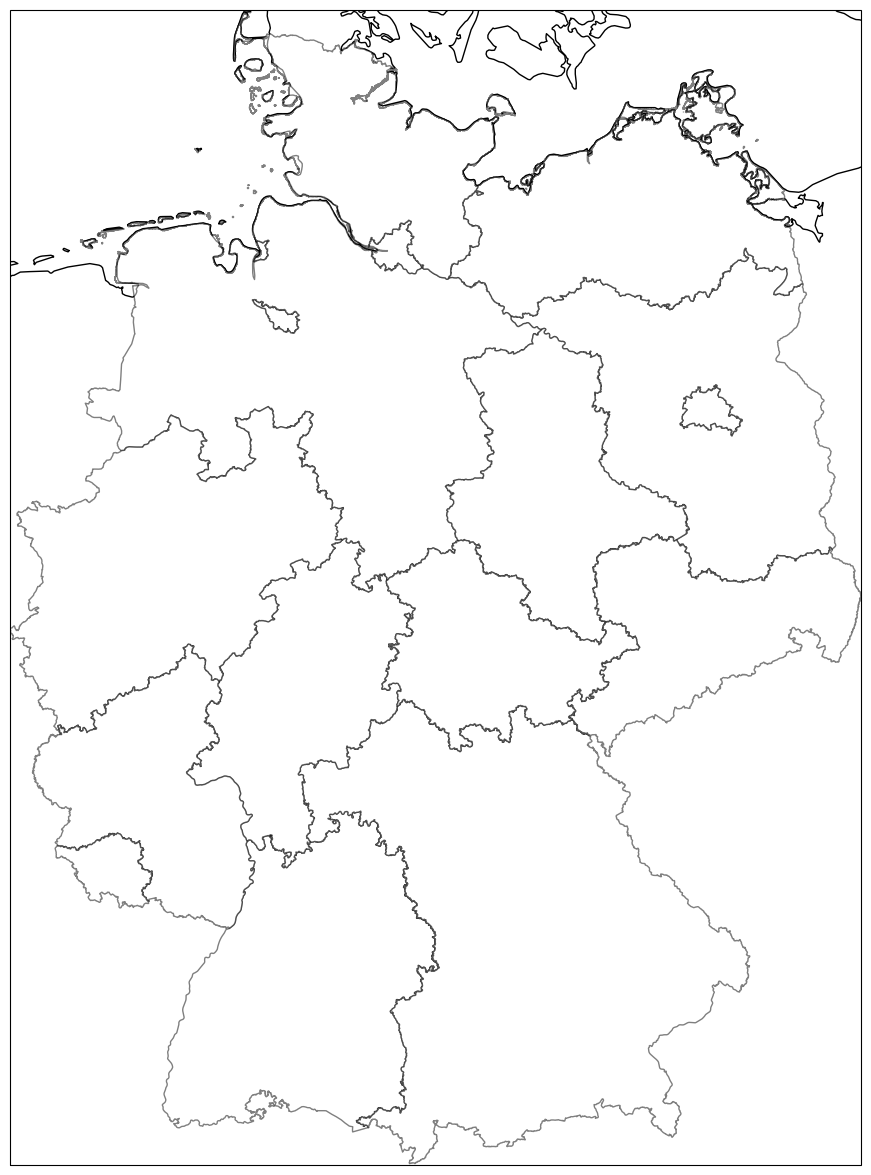

In [55]:
mrc = ccrs.Mercator()

# just to zoom in to only Germany
lons = np.array([5.87, 15.04])
lats = np.array([47.26, 55.06])

fig = plt.figure(figsize=(30,15))  # predefined figure size, change to your liking. 
# But doesn't matter if you save to any vector graphics format though (e.g. pdf)

# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = 'data/DEU_adm1'
adm1_shapes = list(shpreader.Reader(fname).geometries())


ax = plt.axes(projection = mrc)
ax.coastlines(resolution='10m')
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='white', alpha=0.5)

ax.set_extent(np.hstack([lons, lats]), ccrs.PlateCarree()) 

####################
# Your Code Here   #
####################
plt.plot(mrc.transform_points(mrc_ins, spatial_data[:,2], spatial_data[:,3]))

plt.show()

#### Additional task: moving average

Find out briefly what a Moving Average is. You've already explored loops and indexing in the previous exercise. Think about how to write an algorithm that outputs the moving average for a given time series.

- What is a moving average

- Write a function or an algorithm that implements the moving average

- Display the original time series and time series using a moving average filter.

- Is it possible to use other properties besides the mean?

<Figure size 800x600 with 0 Axes>

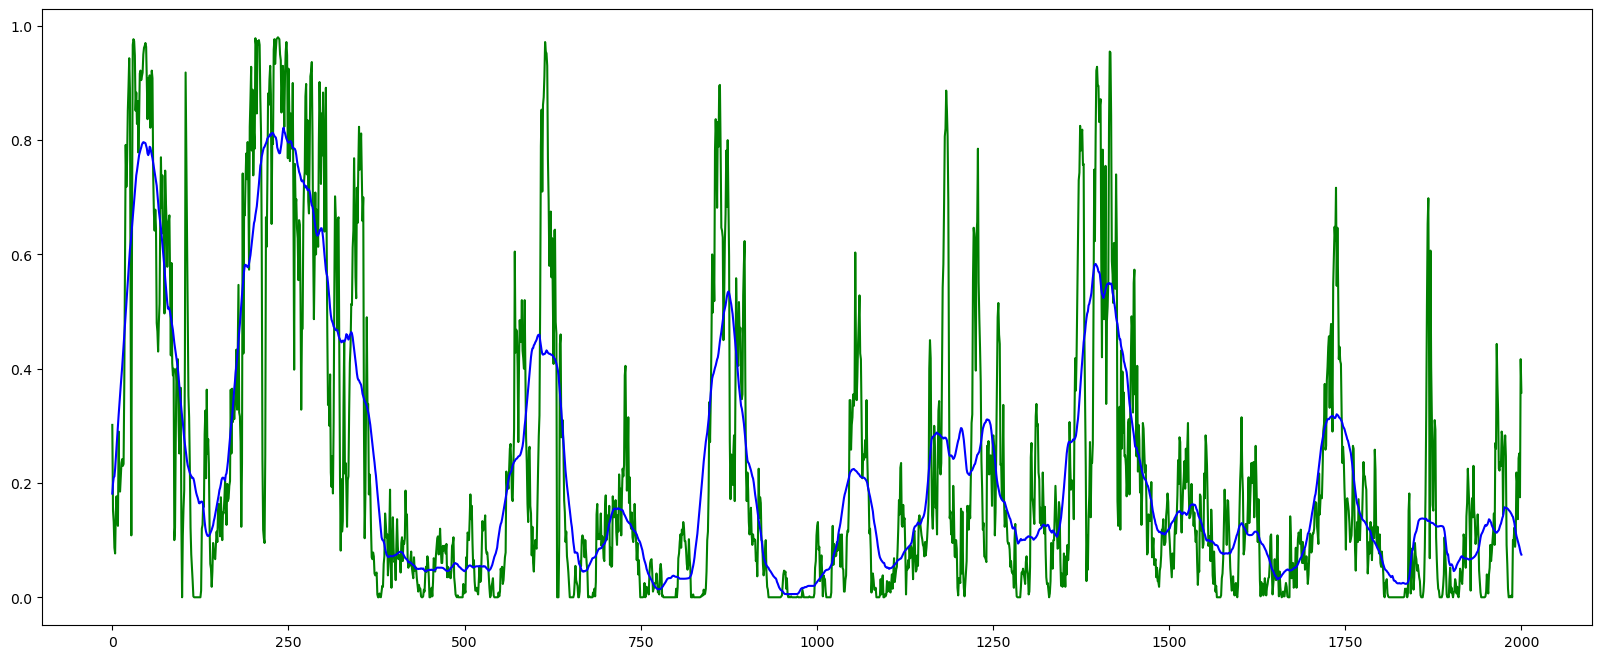

In [98]:
a = np.genfromtxt('data/relative_power_generation.csv', delimiter=',')

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

y=a[1:,1]
x=np.linspace(0,len(y),2000)

####################
# Your Code Here   #
####################
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "same") / w

plt.figure(figsize=(20,8))
plt.plot(x,y, color='green')
plt.plot(x,moving_average(y,50), color='blue')
plt.show()
